In [52]:
import os

import numpy  as np

import matplotlib.pyplot as plt

from CCio   import load_processed

from CCfit import fit
from CCfit import gauss

from CCcore import in_range
from CCcore import filter_df

from CCplot import change_jupyter_width
from CCplot import auto_plot_style
from CCplot import plot1d
from CCplot import plot2d

/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [93]:
auto_plot_style()

In [89]:
def close_to_ex(df, delta=50):
    s   = in_range(df.em_wl, df.ex_wl - delta, df.ex_wl + delta)
    return df.loc[s]

def fit_peak(df):
    df     = close_to_ex(df)
    imax   = np.argmax(df.counts)
    wlmax  = df.em_wl[imax]
    frange = imax - 8, imax + 8
    f = fit(gauss, df.em_wl, df.counts, (1, wlmax, 8))
    return f.values[1]

In [59]:
folder = "/home/gonzalo/data/CC/monochromator_scan_2022_03_01_20_18_48_515000/"
df = load_processed(folder)

In [65]:
df2 = df.groupby("grating_mono ex_wl".split(), as_index=False).apply(lambda df: df.loc[df.exposure==df.exposure.max()]).reset_index(drop=True)
df3 = df2.assign(dwl = df2.em_wl - df2.ex_wl)

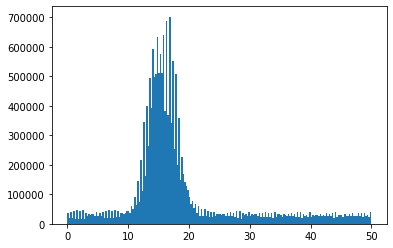

In [51]:
for g, df4 in df3.groupby("grating_mono"):
    plt.hist(df4.dwl, np.linspace(0, 50, 201), weights=df4.counts);
    break

Text(0, 0.5, 'Deviation (nm)')

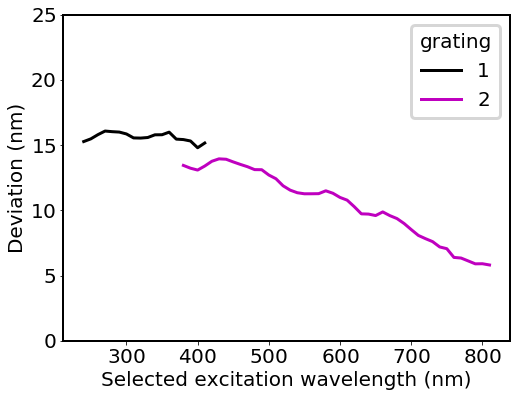

In [98]:
for g, df4 in df3.groupby("grating_mono"):
    a = df4.groupby("ex_wl").apply(fit_peak).reset_index(name="peak")
    plt.plot(a.ex_wl, a.peak - a.ex_wl, label=str(g))

plt.legend(title="grating")
plt.ylim(0, 25)
plt.xlabel("Selected excitation wavelength (nm)")
plt.ylabel("Deviation (nm)")

/home/gonzalo/sw/anaconda3/envs/CC/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


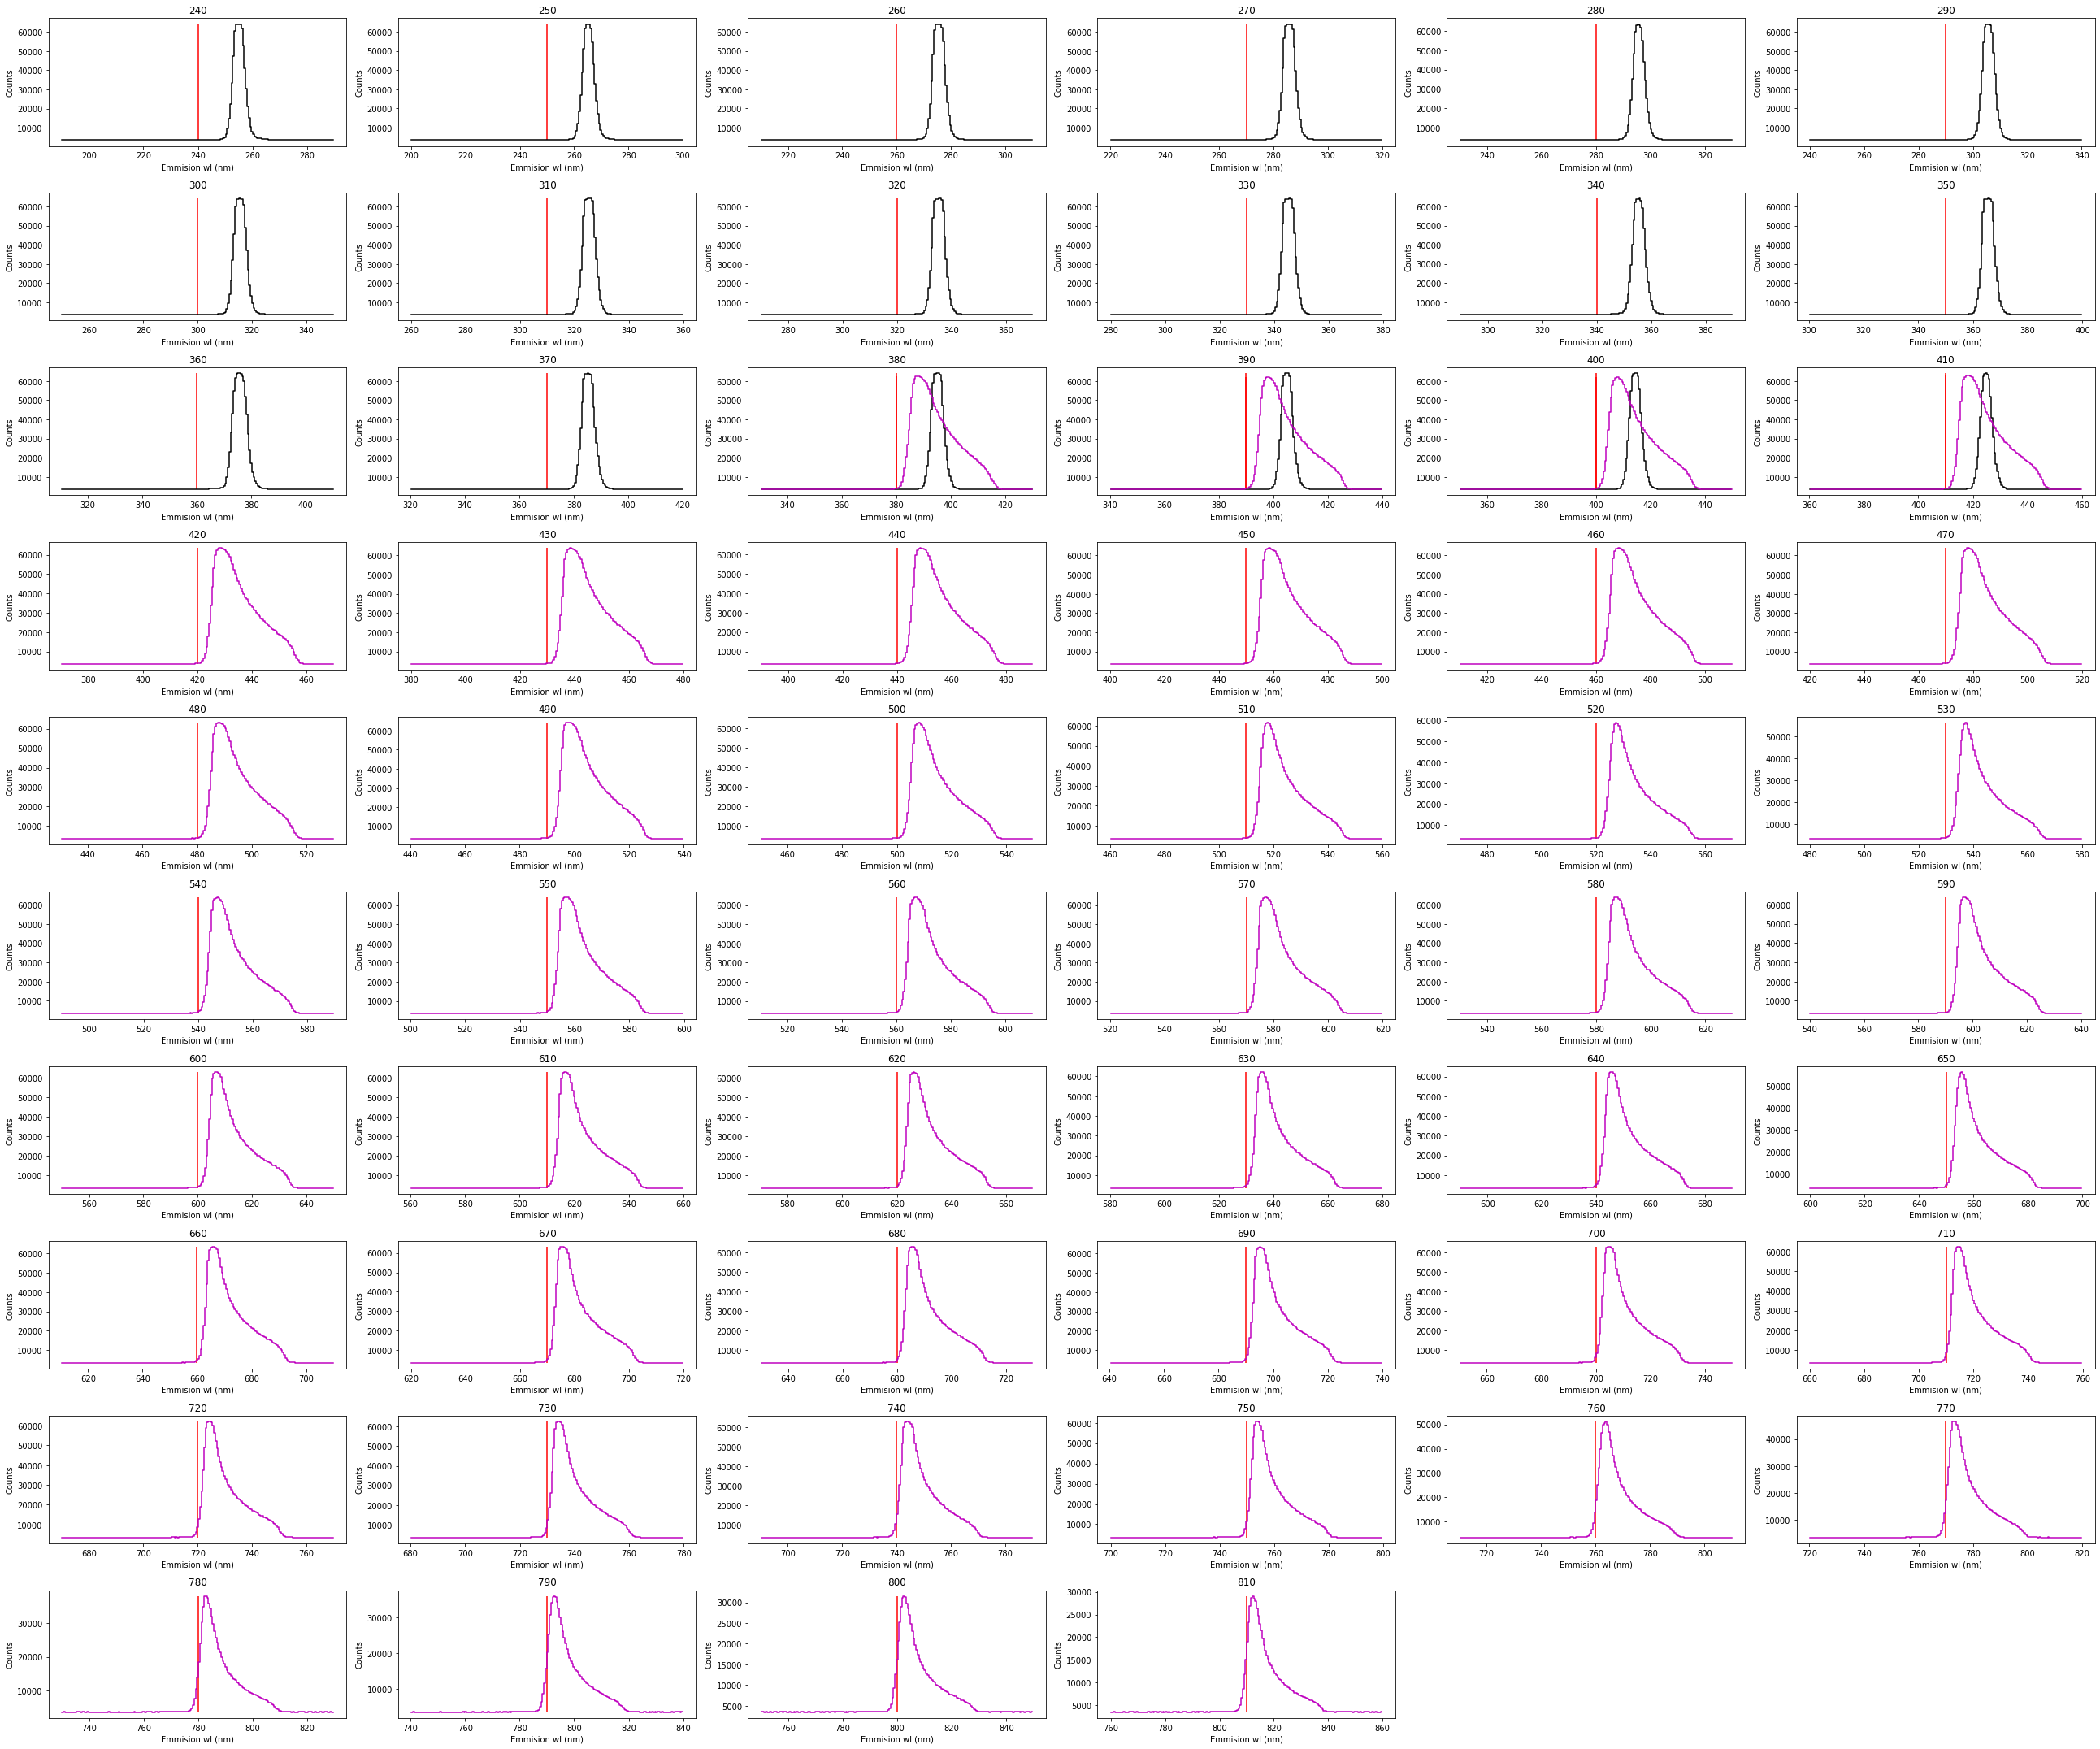

In [38]:
plt.figure(figsize=(6*6, 3*10))
for (g, ex_wl), df3 in df2.groupby("grating_mono ex_wl".split()):
    plt.subplot(10, 6, (ex_wl - 230) // 10)
    s  = in_range(df3.em_wl, ex_wl - 50, ex_wl + 50)
    df3 = df3.loc[s]
    plot1d(df3.em_wl, df3.counts, title=str(ex_wl), color="k" if g==1 else "m")

    plt.vlines(ex_wl, df3.counts.min(), df3.counts.max(), color="r")
    #plt.xlim(ex_wl - 50, ex_wl + 50)
plt.tight_layout()